In [1]:
import sys, os

In [5]:
workDir = os.path.abspath('..')

everestDir = os.path.join(workDir, 'everest')
if not everestDir in sys.path:
    sys.path.insert(0, everestDir)

dataDir = os.path.join(workDir, 'data')

In [46]:
import pandas as pd
import numpy as np

from everest.h5anchor import Reader, Fetch
from everest.window import Canvas
%matplotlib inline

In [194]:
def get_inputs(scope):
    inputs = pd.DataFrame(reader[scope : 'inputs']).transpose()
    toDrop = [col for col in inputs.columns if len(set(inputs[col])) == 1]
#     if 'innerMethod' in inputs:
#         inputs = inputs.drop('innerMethod', axis = 1)
    inputs = inputs.drop(toDrop, axis = 1)
    for col in inputs:
        try:
            inputs[col] = inputs[col].astype(float)
        except ValueError:
            pass
    inputs = inputs.sort_values(list(inputs.columns))
#     inputs = inputs.dropna()
    return inputs

In [9]:
reader = Reader('merged', dataDir)

In [166]:
isoviscs = reader[Fetch('*/type') == 'Isovisc']
arrheniuses = reader[Fetch('*/type') == 'Arrhenius']
viscoplastics = reader[Fetch('*/type') == 'Viscoplastic']

In [216]:
isoInputs = get_inputs(isoviscs)
isoInputs = isoInputs.drop(['initial', 'innerMethod'], axis = 1)
isoInputs['alpha'] = isoInputs['alpha'].apply(np.log10)

/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_tsauhuitsae-drietriflu
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_peaskauslu-thoesfthuec
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_daibsloom-zhuarhexuu
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_sweibeunea-wreuwxiotz
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_kiinfaoj-aighuuoasmou
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py

In [218]:
# for k, v in dict(list(isoInputs.groupby('temperatureField'))).items():
#     print(k, len(v))
# Almost all of these are sinu freq 1 IC; they appear complete up to aspect 2:
sinuIsoInputs = isoinputs.loc[isoinputs['temperatureField'] == '_built_peaskauslu-thoesfthuec']
sinuIsoInputs = dict(list(sinuIsoInputs.groupby(['aspect', 'f'])['alpha']))

_built_aakwualuoch-eerhoatsouch 1
_built_aighuuakwae-raoghvuutr 1
_built_aisfaesweusw-eusfuproadr 1
_built_aopreueeyee-oorhaikwops 1
_built_ariufriips-hauwrhiuv 1
_built_aspuoiwaa-aishauteug 1
_built_blihuuphoo-souqaotz 1
_built_buazsuob-koesmscesw 1
_built_chaixwrupr-aeleaustee 1
_built_efloiianoi-stiotwzeav 1
_built_eifleuootwae-iungiagopl 1
_built_eiroidroesf-tziislaesn 1
_built_ekleukaetr-weewrozei 1
_built_eonapriut-deokrezhea 1
_built_eopruuveec-voopzheofl 1
_built_esmiaphiusm-iawriuouproi 1
_built_fauzhgreuts-eatseapaip 1
_built_fluowkleabl-chiosmthiaw 1
_built_fruivwruuf-ukwaosfeedw 1
_built_gheasfxios-graugriklae 1
_built_glimkleb-shaidsnuots 1
_built_gloosfnuoz-aegliuswiewr 1
_built_greihdwasp-uatiooikruo 1
_built_greispbruch-pootsbief 1
_built_gruumeega-uskaeneow 1
_built_iabreoaadee-iquueotw 1
_built_icuabloar-vihyio 1
_built_iegifauk-ooliaaetsoe 1
_built_jiipjiorh-fridkrusm 1
_built_kluasnwieps-dreewriuphie 1
_built_kwauprrhiisn-xookpheeth 1
_built_loepsiesh-tziisnvuey 1
_

In [220]:
arrInputs = get_inputs(arrheniuses)
arrInputs['alpha'] = arrInputs['alpha'].apply(np.log10)

/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_shocswaeq-uosloopion
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_dwefrtoizh-friogphuuy
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_kliiproublue-draevphoosl
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_shaosfkwuet-oegeodrood
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_sfeanokwie-snuusfiemea
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader

In [221]:
for k, v in dict(list(arrInputs.groupby('temperatureField'))).items():
    print(k, len(v))
# Almost all of these are sinu freq 1 IC; they appear complete:
sinuArrInputs = arrInputs.loc[arrInputs['temperatureField'] == '_built_peaskauslu-thoesfthuec']
sinuArrInputs = dict(list(sinuArrInputs.groupby(['aspect', 'f'])['alpha']))

_built_aepioiighi-uutriuoecue 1
_built_aosfuuietwae-sarsciuwr 1
_built_aruebroib-iotziooekuu 1
_built_boafltwiapl-sfoitwkeikr 1
_built_brieghauye-aebrioaichoi 1
_built_cheabriedwoe-greutheisnea 1
_built_diaxswam-fruepsdweoc 1
_built_dwefrtoizh-friogphuuy 1
_built_dweitzkoirh-diulgleups 1
_built_eekloathesc-plaustfrein 1
_built_eeteaewou-uiswiaxieg 1
_built_eikriiuejo-iiglawafr 1
_built_eupeoaange-iechauuupraa 1
_built_euskieiaste-stoabwuoz 1
_built_eutsuauahoe-luigdraak 1
_built_fezaidao-haashyiogh 1
_built_gaushtwuich-saevjiirh 1
_built_geiwraifl-uowouxeusk 1
_built_griadedoi-rhuitausluo 1
_built_hoatzsnooq-tsuutsoutroi 1
_built_ibliwrogr-praaqgruut 1
_built_iekrgog-eidwiuaiqoi 1
_built_iiploaauthei-isweohair 1
_built_iipseidaesk-leudwriisl 1
_built_iuduiaofree-euniusfue 1
_built_kliiproublue-draevphoosl 1
_built_kliuchspeeps-rhaiklfeaph 1
_built_oazhaeuivua-qoewscoekw 1
_built_oekwaexiech-phuevfruih 1
_built_oisnuekrosw-shaeceiglua 1
_built_peaskauslu-thoesfthuec 298
_built_pseungfro

In [232]:
plasticInputs = get_inputs(viscoplastics)
plasticInputs = plasticInputs.loc[plasticInputs['tauRef'] > 1e4]
plasticInputs['tauRef'] = plasticInputs['tauRef'].apply(np.log10)
plasticInputs = plasticInputs.drop('innerMethod', axis = 1)

/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_peaskauslu-thoesfthuec
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_oiskeaosle-woatihoo
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_eesnuueskui-yunplaev
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_oeviuwreugr-sfaebrplaokw
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reader.py:165: UserWarning: No recognisable tag on string: _built_iiklookwiofl-ghuiglkruifr
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/everest/everest/h5anchor/reade

In [233]:
nonSinus = plasticInputs.loc[plasticInputs['temperatureField'].apply(
    lambda s: not s in {'_built_peaskauslu-thoesfthuec', '_built_oiskeaosle-woatihoo'}
    )]

In [234]:
nonSinus

,aspect,f,tauRef,temperatureField
grooscdoukl-saghtwudr,1.0,0.5,5.00000,_built_iiscaplaaz-puphiuria
ziedkaegr-sweuzheupsoi,1.0,0.5,5.60206,_built_iiscaplaaz-puphiuria
sfuaglgrisp-uuphoiunge,1.0,0.5,6.00000,_built_iiscaplaaz-puphiuria
iogrusteir-glotromo,1.0,0.6,5.00000,_built_stiambaesp-fludrshuezh
tzuawrshuups-stoerhzhuz,1.0,0.7,5.00000,_built_oghoaklaos-oifouscay
oskfuar-eukaodietr,1.0,0.7,5.60206,_built_oghoaklaos-oifouscay
fleetwdroe-freupsuezao,1.0,0.7,6.00000,_built_oghoaklaos-oifouscay
uayiofreasc-iiweauuria,1.0,0.8,5.00000,_built_friobrdrasw-eoxiodioz
uosheasuusk-yoetstheax,1.0,0.8,5.60206,_built_friobrdrasw-eoxiodioz
ozhioxeopl-aaceafaask,1.0,0.8,6.00000,_built_friobrdrasw-eoxiodioz


In [229]:
dict(list(plasticInputs.groupby(['temperatureField', 'aspect', 'f'])['tauRef']))

{('_built_chifruequ-iokwoeuefroo',
  1.0,
  1.0): scioswngiush-angoubliah    5.00000
 uedweiklear-thoablsnufr    5.60206
 wrodsnikr-botwyuez         6.00000
 Name: tauRef, dtype: float64,
 ('_built_eswaoscoeh-scuispyiips',
  3.0,
  0.8): uawuungoegh-oadwiugrousf    5.00000
 qearhaow-eileiimue          5.60206
 druunuku-aalaoghuef         6.00000
 Name: tauRef, dtype: float64,
 ('_built_friobrdrasw-eoxiodioz',
  1.0,
  0.8): uayiofreasc-iiweauuria    5.00000
 uosheasuusk-yoetstheax    5.60206
 ozhioxeopl-aaceafaask     6.00000
 Name: tauRef, dtype: float64,
 ('_built_iiscaplaaz-puphiuria',
  1.0,
  0.5): grooscdoukl-saghtwudr     5.00000
 ziedkaegr-sweuzheupsoi    5.60206
 sfuaglgrisp-uuphoiunge    6.00000
 Name: tauRef, dtype: float64,
 ('_built_oghoaklaos-oifouscay',
  1.0,
  0.7): tzuawrshuups-stoerhzhuz    5.00000
 oskfuar-eukaodietr         5.60206
 fleetwdroe-freupsuezao     6.00000
 Name: tauRef, dtype: float64,
 ('_built_oiskeaosle-woatihoo',
  1.0,
  0.5): ionguiseok-vuachlekr 

_built_chifruequ-iokwoeuefroo 3
_built_eswaoscoeh-scuispyiips 3
_built_friobrdrasw-eoxiodioz 3
_built_iiscaplaaz-puphiuria 3
_built_oghoaklaos-oifouscay 3
_built_oiskeaosle-woatihoo 93
_built_peaskauslu-thoesfthuec 496
_built_stiambaesp-fludrshuezh 1
_built_uogliiiuslu-qaubfliuv 3
_built_wrusnidwa-scoescnaap 3


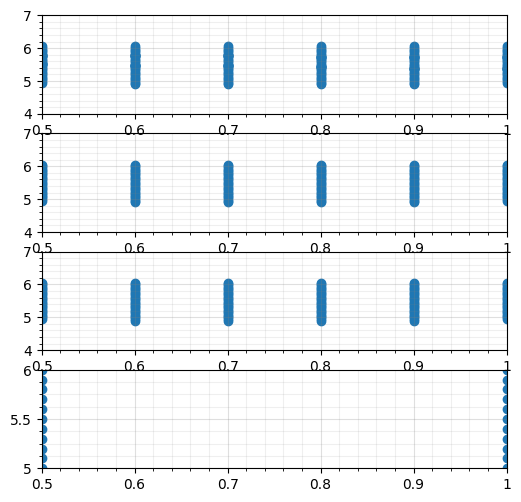

In [227]:
for k, v in dict(list(plasticInputs.groupby('temperatureField'))).items():
    print(k, len(v))
# Almost all of these are sinu freq 1 or 2 IC; they appear complete.
freq1s = dict(list(plasticInputs.groupby('temperatureField')))['_built_peaskauslu-thoesfthuec']
aspects = sorted(set(freq1s['aspect']))
canvas = Canvas(size = (6, 6), shape = (len(aspects), 1))
for i, aspect in enumerate(aspects):
    subFrm = freq1s.loc[freq1s['aspect'] == aspect]
    ax = canvas.make_ax(place = (i, 0))
    ax.scatter(subFrm['f'], subFrm['tauRef'])
canvas.show()